In [25]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models, Sequential, optimizers, losses, metrics, datasets, callbacks
from tensorflow import matmul
import keras_tuner as kt
import seaborn as sns
import os
import pandas as pd
%matplotlib inline
sns.set()

ModuleNotFoundError: No module named 'keras_tuner'

In [13]:
dir = '../images_training_rev1/images_training_rev1/'
filename = '100008.jpg'

In [14]:
img = cv.imread(dir + filename)

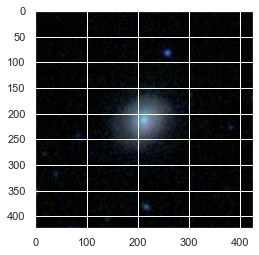

In [15]:
plt.imshow(img)

In [16]:
print(img)

[[[0 2 2]
  [2 4 4]
  [3 5 5]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 5 5]
  [4 6 6]
  [4 6 6]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[5 7 7]
  [6 8 8]
  [6 8 8]
  ...
  [2 2 2]
  [2 2 2]
  [3 3 3]]

 ...

 [[4 6 6]
  [3 5 5]
  [2 4 4]
  ...
  [2 4 4]
  [0 2 2]
  [0 0 0]]

 [[4 6 6]
  [3 5 5]
  [2 4 4]
  ...
  [0 2 2]
  [0 1 1]
  [0 0 0]]

 [[4 6 6]
  [3 5 5]
  [2 4 4]
  ...
  [0 1 1]
  [0 1 1]
  [0 0 0]]]


In [18]:
for filename in os.listdir(dir):
    print(os.path.join(dir, filename))

../images_training_rev1/images_training_rev1/100008.jpg
../images_training_rev1/images_training_rev1/100023.jpg
../images_training_rev1/images_training_rev1/100053.jpg
../images_training_rev1/images_training_rev1/100078.jpg
../images_training_rev1/images_training_rev1/100090.jpg
../images_training_rev1/images_training_rev1/100122.jpg
../images_training_rev1/images_training_rev1/100123.jpg
../images_training_rev1/images_training_rev1/100128.jpg
../images_training_rev1/images_training_rev1/100134.jpg
../images_training_rev1/images_training_rev1/100143.jpg
../images_training_rev1/images_training_rev1/100150.jpg
../images_training_rev1/images_training_rev1/100157.jpg
../images_training_rev1/images_training_rev1/100187.jpg
../images_training_rev1/images_training_rev1/100204.jpg
../images_training_rev1/images_training_rev1/100237.jpg
../images_training_rev1/images_training_rev1/100259.jpg
../images_training_rev1/images_training_rev1/100263.jpg
../images_training_rev1/images_training_rev1/100

../images_training_rev1/images_training_rev1/135336.jpg
../images_training_rev1/images_training_rev1/135337.jpg
../images_training_rev1/images_training_rev1/135338.jpg
../images_training_rev1/images_training_rev1/135351.jpg
../images_training_rev1/images_training_rev1/135352.jpg
../images_training_rev1/images_training_rev1/135353.jpg
../images_training_rev1/images_training_rev1/135359.jpg
../images_training_rev1/images_training_rev1/135363.jpg
../images_training_rev1/images_training_rev1/135416.jpg
../images_training_rev1/images_training_rev1/135417.jpg
../images_training_rev1/images_training_rev1/135440.jpg
../images_training_rev1/images_training_rev1/135441.jpg
../images_training_rev1/images_training_rev1/135449.jpg
../images_training_rev1/images_training_rev1/135453.jpg
../images_training_rev1/images_training_rev1/135456.jpg
../images_training_rev1/images_training_rev1/135494.jpg
../images_training_rev1/images_training_rev1/135499.jpg
../images_training_rev1/images_training_rev1/135

../images_training_rev1/images_training_rev1/161216.jpg
../images_training_rev1/images_training_rev1/161230.jpg
../images_training_rev1/images_training_rev1/161232.jpg
../images_training_rev1/images_training_rev1/161243.jpg
../images_training_rev1/images_training_rev1/161248.jpg
../images_training_rev1/images_training_rev1/161253.jpg
../images_training_rev1/images_training_rev1/161256.jpg
../images_training_rev1/images_training_rev1/161270.jpg
../images_training_rev1/images_training_rev1/161276.jpg
../images_training_rev1/images_training_rev1/161279.jpg
../images_training_rev1/images_training_rev1/161289.jpg
../images_training_rev1/images_training_rev1/161295.jpg
../images_training_rev1/images_training_rev1/161300.jpg
../images_training_rev1/images_training_rev1/161313.jpg
../images_training_rev1/images_training_rev1/161323.jpg
../images_training_rev1/images_training_rev1/161347.jpg
../images_training_rev1/images_training_rev1/161349.jpg
../images_training_rev1/images_training_rev1/161

../images_training_rev1/images_training_rev1/186872.jpg
../images_training_rev1/images_training_rev1/186898.jpg
../images_training_rev1/images_training_rev1/186899.jpg
../images_training_rev1/images_training_rev1/186921.jpg
../images_training_rev1/images_training_rev1/186934.jpg
../images_training_rev1/images_training_rev1/186952.jpg
../images_training_rev1/images_training_rev1/186954.jpg
../images_training_rev1/images_training_rev1/186962.jpg
../images_training_rev1/images_training_rev1/186968.jpg
../images_training_rev1/images_training_rev1/186990.jpg
../images_training_rev1/images_training_rev1/187024.jpg
../images_training_rev1/images_training_rev1/187041.jpg
../images_training_rev1/images_training_rev1/187072.jpg
../images_training_rev1/images_training_rev1/187098.jpg
../images_training_rev1/images_training_rev1/187113.jpg
../images_training_rev1/images_training_rev1/187215.jpg
../images_training_rev1/images_training_rev1/187221.jpg
../images_training_rev1/images_training_rev1/187

../images_training_rev1/images_training_rev1/215463.jpg
../images_training_rev1/images_training_rev1/215476.jpg
../images_training_rev1/images_training_rev1/215499.jpg
../images_training_rev1/images_training_rev1/215530.jpg
../images_training_rev1/images_training_rev1/215537.jpg
../images_training_rev1/images_training_rev1/215549.jpg
../images_training_rev1/images_training_rev1/215581.jpg
../images_training_rev1/images_training_rev1/215613.jpg
../images_training_rev1/images_training_rev1/215614.jpg
../images_training_rev1/images_training_rev1/215635.jpg
../images_training_rev1/images_training_rev1/215640.jpg
../images_training_rev1/images_training_rev1/215645.jpg
../images_training_rev1/images_training_rev1/215724.jpg
../images_training_rev1/images_training_rev1/215730.jpg
../images_training_rev1/images_training_rev1/215734.jpg
../images_training_rev1/images_training_rev1/215735.jpg
../images_training_rev1/images_training_rev1/215743.jpg
../images_training_rev1/images_training_rev1/215

../images_training_rev1/images_training_rev1/238810.jpg
../images_training_rev1/images_training_rev1/238818.jpg
../images_training_rev1/images_training_rev1/238822.jpg
../images_training_rev1/images_training_rev1/238867.jpg
../images_training_rev1/images_training_rev1/238873.jpg
../images_training_rev1/images_training_rev1/238878.jpg
../images_training_rev1/images_training_rev1/238889.jpg
../images_training_rev1/images_training_rev1/238899.jpg
../images_training_rev1/images_training_rev1/238901.jpg
../images_training_rev1/images_training_rev1/238904.jpg
../images_training_rev1/images_training_rev1/238917.jpg
../images_training_rev1/images_training_rev1/238922.jpg
../images_training_rev1/images_training_rev1/238946.jpg
../images_training_rev1/images_training_rev1/238949.jpg
../images_training_rev1/images_training_rev1/239010.jpg
../images_training_rev1/images_training_rev1/239090.jpg
../images_training_rev1/images_training_rev1/239092.jpg
../images_training_rev1/images_training_rev1/239

../images_training_rev1/images_training_rev1/261196.jpg
../images_training_rev1/images_training_rev1/261204.jpg
../images_training_rev1/images_training_rev1/261207.jpg
../images_training_rev1/images_training_rev1/261213.jpg
../images_training_rev1/images_training_rev1/261225.jpg
../images_training_rev1/images_training_rev1/261294.jpg
../images_training_rev1/images_training_rev1/261309.jpg
../images_training_rev1/images_training_rev1/261311.jpg
../images_training_rev1/images_training_rev1/261313.jpg
../images_training_rev1/images_training_rev1/261316.jpg
../images_training_rev1/images_training_rev1/261333.jpg
../images_training_rev1/images_training_rev1/261356.jpg
../images_training_rev1/images_training_rev1/261359.jpg
../images_training_rev1/images_training_rev1/261375.jpg
../images_training_rev1/images_training_rev1/261392.jpg
../images_training_rev1/images_training_rev1/261411.jpg
../images_training_rev1/images_training_rev1/261414.jpg
../images_training_rev1/images_training_rev1/261

../images_training_rev1/images_training_rev1/287845.jpg
../images_training_rev1/images_training_rev1/287846.jpg
../images_training_rev1/images_training_rev1/287875.jpg
../images_training_rev1/images_training_rev1/287881.jpg
../images_training_rev1/images_training_rev1/287901.jpg
../images_training_rev1/images_training_rev1/287905.jpg
../images_training_rev1/images_training_rev1/287917.jpg
../images_training_rev1/images_training_rev1/287921.jpg
../images_training_rev1/images_training_rev1/287945.jpg
../images_training_rev1/images_training_rev1/287956.jpg
../images_training_rev1/images_training_rev1/287971.jpg
../images_training_rev1/images_training_rev1/287987.jpg
../images_training_rev1/images_training_rev1/287998.jpg
../images_training_rev1/images_training_rev1/288001.jpg
../images_training_rev1/images_training_rev1/288013.jpg
../images_training_rev1/images_training_rev1/288021.jpg
../images_training_rev1/images_training_rev1/288034.jpg
../images_training_rev1/images_training_rev1/288

../images_training_rev1/images_training_rev1/312695.jpg
../images_training_rev1/images_training_rev1/312738.jpg
../images_training_rev1/images_training_rev1/312787.jpg
../images_training_rev1/images_training_rev1/312795.jpg
../images_training_rev1/images_training_rev1/312814.jpg
../images_training_rev1/images_training_rev1/312815.jpg
../images_training_rev1/images_training_rev1/312819.jpg
../images_training_rev1/images_training_rev1/312859.jpg
../images_training_rev1/images_training_rev1/312889.jpg
../images_training_rev1/images_training_rev1/312895.jpg
../images_training_rev1/images_training_rev1/312917.jpg
../images_training_rev1/images_training_rev1/312941.jpg
../images_training_rev1/images_training_rev1/312946.jpg
../images_training_rev1/images_training_rev1/312948.jpg
../images_training_rev1/images_training_rev1/312949.jpg
../images_training_rev1/images_training_rev1/312965.jpg
../images_training_rev1/images_training_rev1/312988.jpg
../images_training_rev1/images_training_rev1/312

../images_training_rev1/images_training_rev1/341685.jpg
../images_training_rev1/images_training_rev1/341699.jpg
../images_training_rev1/images_training_rev1/341743.jpg
../images_training_rev1/images_training_rev1/341747.jpg
../images_training_rev1/images_training_rev1/341749.jpg
../images_training_rev1/images_training_rev1/341751.jpg
../images_training_rev1/images_training_rev1/341756.jpg
../images_training_rev1/images_training_rev1/341759.jpg
../images_training_rev1/images_training_rev1/341763.jpg
../images_training_rev1/images_training_rev1/341766.jpg
../images_training_rev1/images_training_rev1/341769.jpg
../images_training_rev1/images_training_rev1/341781.jpg
../images_training_rev1/images_training_rev1/341795.jpg
../images_training_rev1/images_training_rev1/341844.jpg
../images_training_rev1/images_training_rev1/341848.jpg
../images_training_rev1/images_training_rev1/341859.jpg
../images_training_rev1/images_training_rev1/341864.jpg
../images_training_rev1/images_training_rev1/341

../images_training_rev1/images_training_rev1/370191.jpg
../images_training_rev1/images_training_rev1/370193.jpg
../images_training_rev1/images_training_rev1/370205.jpg
../images_training_rev1/images_training_rev1/370232.jpg
../images_training_rev1/images_training_rev1/370243.jpg
../images_training_rev1/images_training_rev1/370272.jpg
../images_training_rev1/images_training_rev1/370283.jpg
../images_training_rev1/images_training_rev1/370286.jpg
../images_training_rev1/images_training_rev1/370299.jpg
../images_training_rev1/images_training_rev1/370316.jpg
../images_training_rev1/images_training_rev1/370341.jpg
../images_training_rev1/images_training_rev1/370358.jpg
../images_training_rev1/images_training_rev1/370396.jpg
../images_training_rev1/images_training_rev1/370405.jpg
../images_training_rev1/images_training_rev1/370422.jpg
../images_training_rev1/images_training_rev1/370426.jpg
../images_training_rev1/images_training_rev1/370432.jpg
../images_training_rev1/images_training_rev1/370

../images_training_rev1/images_training_rev1/392096.jpg
../images_training_rev1/images_training_rev1/392112.jpg
../images_training_rev1/images_training_rev1/392118.jpg
../images_training_rev1/images_training_rev1/392123.jpg
../images_training_rev1/images_training_rev1/392135.jpg
../images_training_rev1/images_training_rev1/392148.jpg
../images_training_rev1/images_training_rev1/392153.jpg
../images_training_rev1/images_training_rev1/392165.jpg
../images_training_rev1/images_training_rev1/392174.jpg
../images_training_rev1/images_training_rev1/392196.jpg
../images_training_rev1/images_training_rev1/392216.jpg
../images_training_rev1/images_training_rev1/392221.jpg
../images_training_rev1/images_training_rev1/392237.jpg
../images_training_rev1/images_training_rev1/392241.jpg
../images_training_rev1/images_training_rev1/392248.jpg
../images_training_rev1/images_training_rev1/392253.jpg
../images_training_rev1/images_training_rev1/392265.jpg
../images_training_rev1/images_training_rev1/392

../images_training_rev1/images_training_rev1/419395.jpg
../images_training_rev1/images_training_rev1/419413.jpg
../images_training_rev1/images_training_rev1/419423.jpg
../images_training_rev1/images_training_rev1/419429.jpg
../images_training_rev1/images_training_rev1/419442.jpg
../images_training_rev1/images_training_rev1/419468.jpg
../images_training_rev1/images_training_rev1/419487.jpg
../images_training_rev1/images_training_rev1/419495.jpg
../images_training_rev1/images_training_rev1/419499.jpg
../images_training_rev1/images_training_rev1/419500.jpg
../images_training_rev1/images_training_rev1/419504.jpg
../images_training_rev1/images_training_rev1/419514.jpg
../images_training_rev1/images_training_rev1/419528.jpg
../images_training_rev1/images_training_rev1/419545.jpg
../images_training_rev1/images_training_rev1/419555.jpg
../images_training_rev1/images_training_rev1/419577.jpg
../images_training_rev1/images_training_rev1/419598.jpg
../images_training_rev1/images_training_rev1/419

../images_training_rev1/images_training_rev1/448430.jpg
../images_training_rev1/images_training_rev1/448434.jpg
../images_training_rev1/images_training_rev1/448463.jpg
../images_training_rev1/images_training_rev1/448483.jpg
../images_training_rev1/images_training_rev1/448485.jpg
../images_training_rev1/images_training_rev1/448494.jpg
../images_training_rev1/images_training_rev1/448496.jpg
../images_training_rev1/images_training_rev1/448497.jpg
../images_training_rev1/images_training_rev1/448506.jpg
../images_training_rev1/images_training_rev1/448515.jpg
../images_training_rev1/images_training_rev1/448516.jpg
../images_training_rev1/images_training_rev1/448521.jpg
../images_training_rev1/images_training_rev1/448522.jpg
../images_training_rev1/images_training_rev1/448523.jpg
../images_training_rev1/images_training_rev1/448531.jpg
../images_training_rev1/images_training_rev1/448541.jpg
../images_training_rev1/images_training_rev1/448568.jpg
../images_training_rev1/images_training_rev1/448

../images_training_rev1/images_training_rev1/477817.jpg
../images_training_rev1/images_training_rev1/477832.jpg
../images_training_rev1/images_training_rev1/477871.jpg
../images_training_rev1/images_training_rev1/477925.jpg
../images_training_rev1/images_training_rev1/477935.jpg
../images_training_rev1/images_training_rev1/477941.jpg
../images_training_rev1/images_training_rev1/477960.jpg
../images_training_rev1/images_training_rev1/477980.jpg
../images_training_rev1/images_training_rev1/477988.jpg
../images_training_rev1/images_training_rev1/478010.jpg
../images_training_rev1/images_training_rev1/478011.jpg
../images_training_rev1/images_training_rev1/478014.jpg
../images_training_rev1/images_training_rev1/478044.jpg
../images_training_rev1/images_training_rev1/478046.jpg
../images_training_rev1/images_training_rev1/478113.jpg
../images_training_rev1/images_training_rev1/478138.jpg
../images_training_rev1/images_training_rev1/478141.jpg
../images_training_rev1/images_training_rev1/478

../images_training_rev1/images_training_rev1/501549.jpg
../images_training_rev1/images_training_rev1/501552.jpg
../images_training_rev1/images_training_rev1/501557.jpg
../images_training_rev1/images_training_rev1/501605.jpg
../images_training_rev1/images_training_rev1/501614.jpg
../images_training_rev1/images_training_rev1/501616.jpg
../images_training_rev1/images_training_rev1/501619.jpg
../images_training_rev1/images_training_rev1/501658.jpg
../images_training_rev1/images_training_rev1/501677.jpg
../images_training_rev1/images_training_rev1/501684.jpg
../images_training_rev1/images_training_rev1/501704.jpg
../images_training_rev1/images_training_rev1/501716.jpg
../images_training_rev1/images_training_rev1/501739.jpg
../images_training_rev1/images_training_rev1/501765.jpg
../images_training_rev1/images_training_rev1/501768.jpg
../images_training_rev1/images_training_rev1/501840.jpg
../images_training_rev1/images_training_rev1/501871.jpg
../images_training_rev1/images_training_rev1/501

../images_training_rev1/images_training_rev1/530029.jpg
../images_training_rev1/images_training_rev1/530033.jpg
../images_training_rev1/images_training_rev1/530044.jpg
../images_training_rev1/images_training_rev1/530076.jpg
../images_training_rev1/images_training_rev1/530084.jpg
../images_training_rev1/images_training_rev1/530113.jpg
../images_training_rev1/images_training_rev1/530121.jpg
../images_training_rev1/images_training_rev1/530162.jpg
../images_training_rev1/images_training_rev1/530165.jpg
../images_training_rev1/images_training_rev1/530169.jpg
../images_training_rev1/images_training_rev1/530194.jpg
../images_training_rev1/images_training_rev1/530216.jpg
../images_training_rev1/images_training_rev1/530233.jpg
../images_training_rev1/images_training_rev1/530256.jpg
../images_training_rev1/images_training_rev1/530257.jpg
../images_training_rev1/images_training_rev1/530263.jpg
../images_training_rev1/images_training_rev1/530270.jpg
../images_training_rev1/images_training_rev1/530

../images_training_rev1/images_training_rev1/556089.jpg
../images_training_rev1/images_training_rev1/556103.jpg
../images_training_rev1/images_training_rev1/556121.jpg
../images_training_rev1/images_training_rev1/556127.jpg
../images_training_rev1/images_training_rev1/556135.jpg
../images_training_rev1/images_training_rev1/556136.jpg
../images_training_rev1/images_training_rev1/556144.jpg
../images_training_rev1/images_training_rev1/556154.jpg
../images_training_rev1/images_training_rev1/556156.jpg
../images_training_rev1/images_training_rev1/556203.jpg
../images_training_rev1/images_training_rev1/556210.jpg
../images_training_rev1/images_training_rev1/556218.jpg
../images_training_rev1/images_training_rev1/556221.jpg
../images_training_rev1/images_training_rev1/556238.jpg
../images_training_rev1/images_training_rev1/556251.jpg
../images_training_rev1/images_training_rev1/556254.jpg
../images_training_rev1/images_training_rev1/556287.jpg
../images_training_rev1/images_training_rev1/556

../images_training_rev1/images_training_rev1/577708.jpg
../images_training_rev1/images_training_rev1/577718.jpg
../images_training_rev1/images_training_rev1/577764.jpg
../images_training_rev1/images_training_rev1/577782.jpg
../images_training_rev1/images_training_rev1/577793.jpg
../images_training_rev1/images_training_rev1/577797.jpg
../images_training_rev1/images_training_rev1/577800.jpg
../images_training_rev1/images_training_rev1/577813.jpg
../images_training_rev1/images_training_rev1/577816.jpg
../images_training_rev1/images_training_rev1/577829.jpg
../images_training_rev1/images_training_rev1/577847.jpg
../images_training_rev1/images_training_rev1/577864.jpg
../images_training_rev1/images_training_rev1/577889.jpg
../images_training_rev1/images_training_rev1/577926.jpg
../images_training_rev1/images_training_rev1/577947.jpg
../images_training_rev1/images_training_rev1/577950.jpg
../images_training_rev1/images_training_rev1/577995.jpg
../images_training_rev1/images_training_rev1/578

../images_training_rev1/images_training_rev1/602737.jpg
../images_training_rev1/images_training_rev1/602743.jpg
../images_training_rev1/images_training_rev1/602752.jpg
../images_training_rev1/images_training_rev1/602766.jpg
../images_training_rev1/images_training_rev1/602778.jpg
../images_training_rev1/images_training_rev1/602781.jpg
../images_training_rev1/images_training_rev1/602797.jpg
../images_training_rev1/images_training_rev1/602801.jpg
../images_training_rev1/images_training_rev1/602803.jpg
../images_training_rev1/images_training_rev1/602805.jpg
../images_training_rev1/images_training_rev1/602808.jpg
../images_training_rev1/images_training_rev1/602817.jpg
../images_training_rev1/images_training_rev1/602831.jpg
../images_training_rev1/images_training_rev1/602868.jpg
../images_training_rev1/images_training_rev1/602908.jpg
../images_training_rev1/images_training_rev1/602910.jpg
../images_training_rev1/images_training_rev1/602911.jpg
../images_training_rev1/images_training_rev1/602

../images_training_rev1/images_training_rev1/615557.jpg
../images_training_rev1/images_training_rev1/615603.jpg
../images_training_rev1/images_training_rev1/615610.jpg
../images_training_rev1/images_training_rev1/615611.jpg
../images_training_rev1/images_training_rev1/615612.jpg
../images_training_rev1/images_training_rev1/615618.jpg
../images_training_rev1/images_training_rev1/615622.jpg
../images_training_rev1/images_training_rev1/615629.jpg
../images_training_rev1/images_training_rev1/615643.jpg
../images_training_rev1/images_training_rev1/615675.jpg
../images_training_rev1/images_training_rev1/615690.jpg
../images_training_rev1/images_training_rev1/615698.jpg
../images_training_rev1/images_training_rev1/615706.jpg
../images_training_rev1/images_training_rev1/615723.jpg
../images_training_rev1/images_training_rev1/615733.jpg
../images_training_rev1/images_training_rev1/615737.jpg
../images_training_rev1/images_training_rev1/615754.jpg
../images_training_rev1/images_training_rev1/615

../images_training_rev1/images_training_rev1/645778.jpg
../images_training_rev1/images_training_rev1/645795.jpg
../images_training_rev1/images_training_rev1/645831.jpg
../images_training_rev1/images_training_rev1/645848.jpg
../images_training_rev1/images_training_rev1/645863.jpg
../images_training_rev1/images_training_rev1/645909.jpg
../images_training_rev1/images_training_rev1/645920.jpg
../images_training_rev1/images_training_rev1/645943.jpg
../images_training_rev1/images_training_rev1/645944.jpg
../images_training_rev1/images_training_rev1/645951.jpg
../images_training_rev1/images_training_rev1/645958.jpg
../images_training_rev1/images_training_rev1/645959.jpg
../images_training_rev1/images_training_rev1/645970.jpg
../images_training_rev1/images_training_rev1/645972.jpg
../images_training_rev1/images_training_rev1/645979.jpg
../images_training_rev1/images_training_rev1/645990.jpg
../images_training_rev1/images_training_rev1/645995.jpg
../images_training_rev1/images_training_rev1/646

../images_training_rev1/images_training_rev1/668850.jpg
../images_training_rev1/images_training_rev1/668861.jpg
../images_training_rev1/images_training_rev1/668886.jpg
../images_training_rev1/images_training_rev1/668893.jpg
../images_training_rev1/images_training_rev1/668895.jpg
../images_training_rev1/images_training_rev1/668903.jpg
../images_training_rev1/images_training_rev1/668907.jpg
../images_training_rev1/images_training_rev1/668926.jpg
../images_training_rev1/images_training_rev1/668954.jpg
../images_training_rev1/images_training_rev1/668979.jpg
../images_training_rev1/images_training_rev1/668983.jpg
../images_training_rev1/images_training_rev1/668994.jpg
../images_training_rev1/images_training_rev1/669001.jpg
../images_training_rev1/images_training_rev1/669027.jpg
../images_training_rev1/images_training_rev1/669059.jpg
../images_training_rev1/images_training_rev1/669061.jpg
../images_training_rev1/images_training_rev1/669094.jpg
../images_training_rev1/images_training_rev1/669

../images_training_rev1/images_training_rev1/691716.jpg
../images_training_rev1/images_training_rev1/691723.jpg
../images_training_rev1/images_training_rev1/691748.jpg
../images_training_rev1/images_training_rev1/691771.jpg
../images_training_rev1/images_training_rev1/691782.jpg
../images_training_rev1/images_training_rev1/691783.jpg
../images_training_rev1/images_training_rev1/691786.jpg
../images_training_rev1/images_training_rev1/691798.jpg
../images_training_rev1/images_training_rev1/691831.jpg
../images_training_rev1/images_training_rev1/691840.jpg
../images_training_rev1/images_training_rev1/691871.jpg
../images_training_rev1/images_training_rev1/691875.jpg
../images_training_rev1/images_training_rev1/691883.jpg
../images_training_rev1/images_training_rev1/691901.jpg
../images_training_rev1/images_training_rev1/691909.jpg
../images_training_rev1/images_training_rev1/691917.jpg
../images_training_rev1/images_training_rev1/691943.jpg
../images_training_rev1/images_training_rev1/691

../images_training_rev1/images_training_rev1/713859.jpg
../images_training_rev1/images_training_rev1/713871.jpg
../images_training_rev1/images_training_rev1/713882.jpg
../images_training_rev1/images_training_rev1/713891.jpg
../images_training_rev1/images_training_rev1/713892.jpg
../images_training_rev1/images_training_rev1/713948.jpg
../images_training_rev1/images_training_rev1/713954.jpg
../images_training_rev1/images_training_rev1/713983.jpg
../images_training_rev1/images_training_rev1/713992.jpg
../images_training_rev1/images_training_rev1/713997.jpg
../images_training_rev1/images_training_rev1/714014.jpg
../images_training_rev1/images_training_rev1/714025.jpg
../images_training_rev1/images_training_rev1/714042.jpg
../images_training_rev1/images_training_rev1/714056.jpg
../images_training_rev1/images_training_rev1/714075.jpg
../images_training_rev1/images_training_rev1/714097.jpg
../images_training_rev1/images_training_rev1/714114.jpg
../images_training_rev1/images_training_rev1/714

../images_training_rev1/images_training_rev1/738222.jpg
../images_training_rev1/images_training_rev1/738246.jpg
../images_training_rev1/images_training_rev1/738247.jpg
../images_training_rev1/images_training_rev1/738255.jpg
../images_training_rev1/images_training_rev1/738274.jpg
../images_training_rev1/images_training_rev1/738304.jpg
../images_training_rev1/images_training_rev1/738316.jpg
../images_training_rev1/images_training_rev1/738318.jpg
../images_training_rev1/images_training_rev1/738343.jpg
../images_training_rev1/images_training_rev1/738397.jpg
../images_training_rev1/images_training_rev1/738407.jpg
../images_training_rev1/images_training_rev1/738414.jpg
../images_training_rev1/images_training_rev1/738421.jpg
../images_training_rev1/images_training_rev1/738463.jpg
../images_training_rev1/images_training_rev1/738469.jpg
../images_training_rev1/images_training_rev1/738475.jpg
../images_training_rev1/images_training_rev1/738480.jpg
../images_training_rev1/images_training_rev1/738

../images_training_rev1/images_training_rev1/759797.jpg
../images_training_rev1/images_training_rev1/759818.jpg
../images_training_rev1/images_training_rev1/759834.jpg
../images_training_rev1/images_training_rev1/759841.jpg
../images_training_rev1/images_training_rev1/759855.jpg
../images_training_rev1/images_training_rev1/759859.jpg
../images_training_rev1/images_training_rev1/759864.jpg
../images_training_rev1/images_training_rev1/759869.jpg
../images_training_rev1/images_training_rev1/759875.jpg
../images_training_rev1/images_training_rev1/759882.jpg
../images_training_rev1/images_training_rev1/759886.jpg
../images_training_rev1/images_training_rev1/759887.jpg
../images_training_rev1/images_training_rev1/759901.jpg
../images_training_rev1/images_training_rev1/759937.jpg
../images_training_rev1/images_training_rev1/759947.jpg
../images_training_rev1/images_training_rev1/759953.jpg
../images_training_rev1/images_training_rev1/759958.jpg
../images_training_rev1/images_training_rev1/759

../images_training_rev1/images_training_rev1/784458.jpg
../images_training_rev1/images_training_rev1/784468.jpg
../images_training_rev1/images_training_rev1/784527.jpg
../images_training_rev1/images_training_rev1/784528.jpg
../images_training_rev1/images_training_rev1/784529.jpg
../images_training_rev1/images_training_rev1/784553.jpg
../images_training_rev1/images_training_rev1/784592.jpg
../images_training_rev1/images_training_rev1/784616.jpg
../images_training_rev1/images_training_rev1/784629.jpg
../images_training_rev1/images_training_rev1/784638.jpg
../images_training_rev1/images_training_rev1/784641.jpg
../images_training_rev1/images_training_rev1/784644.jpg
../images_training_rev1/images_training_rev1/784648.jpg
../images_training_rev1/images_training_rev1/784656.jpg
../images_training_rev1/images_training_rev1/784693.jpg
../images_training_rev1/images_training_rev1/784701.jpg
../images_training_rev1/images_training_rev1/784799.jpg
../images_training_rev1/images_training_rev1/784

../images_training_rev1/images_training_rev1/807282.jpg
../images_training_rev1/images_training_rev1/807305.jpg
../images_training_rev1/images_training_rev1/807324.jpg
../images_training_rev1/images_training_rev1/807329.jpg
../images_training_rev1/images_training_rev1/807341.jpg
../images_training_rev1/images_training_rev1/807346.jpg
../images_training_rev1/images_training_rev1/807350.jpg
../images_training_rev1/images_training_rev1/807370.jpg
../images_training_rev1/images_training_rev1/807376.jpg
../images_training_rev1/images_training_rev1/807386.jpg
../images_training_rev1/images_training_rev1/807396.jpg
../images_training_rev1/images_training_rev1/807397.jpg
../images_training_rev1/images_training_rev1/807409.jpg
../images_training_rev1/images_training_rev1/807431.jpg
../images_training_rev1/images_training_rev1/807436.jpg
../images_training_rev1/images_training_rev1/807466.jpg
../images_training_rev1/images_training_rev1/807478.jpg
../images_training_rev1/images_training_rev1/807

../images_training_rev1/images_training_rev1/826587.jpg
../images_training_rev1/images_training_rev1/826599.jpg
../images_training_rev1/images_training_rev1/826602.jpg
../images_training_rev1/images_training_rev1/826605.jpg
../images_training_rev1/images_training_rev1/826611.jpg
../images_training_rev1/images_training_rev1/826614.jpg
../images_training_rev1/images_training_rev1/826617.jpg
../images_training_rev1/images_training_rev1/826618.jpg
../images_training_rev1/images_training_rev1/826662.jpg
../images_training_rev1/images_training_rev1/826666.jpg
../images_training_rev1/images_training_rev1/826685.jpg
../images_training_rev1/images_training_rev1/826686.jpg
../images_training_rev1/images_training_rev1/826692.jpg
../images_training_rev1/images_training_rev1/826740.jpg
../images_training_rev1/images_training_rev1/826761.jpg
../images_training_rev1/images_training_rev1/826788.jpg
../images_training_rev1/images_training_rev1/826836.jpg
../images_training_rev1/images_training_rev1/826

../images_training_rev1/images_training_rev1/847741.jpg
../images_training_rev1/images_training_rev1/847743.jpg
../images_training_rev1/images_training_rev1/847754.jpg
../images_training_rev1/images_training_rev1/847827.jpg
../images_training_rev1/images_training_rev1/847852.jpg
../images_training_rev1/images_training_rev1/847862.jpg
../images_training_rev1/images_training_rev1/847885.jpg
../images_training_rev1/images_training_rev1/847905.jpg
../images_training_rev1/images_training_rev1/847912.jpg
../images_training_rev1/images_training_rev1/847923.jpg
../images_training_rev1/images_training_rev1/847943.jpg
../images_training_rev1/images_training_rev1/847947.jpg
../images_training_rev1/images_training_rev1/847995.jpg
../images_training_rev1/images_training_rev1/848023.jpg
../images_training_rev1/images_training_rev1/848032.jpg
../images_training_rev1/images_training_rev1/848034.jpg
../images_training_rev1/images_training_rev1/848040.jpg
../images_training_rev1/images_training_rev1/848

../images_training_rev1/images_training_rev1/878186.jpg
../images_training_rev1/images_training_rev1/878188.jpg
../images_training_rev1/images_training_rev1/878194.jpg
../images_training_rev1/images_training_rev1/878199.jpg
../images_training_rev1/images_training_rev1/878219.jpg
../images_training_rev1/images_training_rev1/878239.jpg
../images_training_rev1/images_training_rev1/878260.jpg
../images_training_rev1/images_training_rev1/878265.jpg
../images_training_rev1/images_training_rev1/878288.jpg
../images_training_rev1/images_training_rev1/878295.jpg
../images_training_rev1/images_training_rev1/878298.jpg
../images_training_rev1/images_training_rev1/878308.jpg
../images_training_rev1/images_training_rev1/878323.jpg
../images_training_rev1/images_training_rev1/878326.jpg
../images_training_rev1/images_training_rev1/878337.jpg
../images_training_rev1/images_training_rev1/878340.jpg
../images_training_rev1/images_training_rev1/878348.jpg
../images_training_rev1/images_training_rev1/878

../images_training_rev1/images_training_rev1/908638.jpg
../images_training_rev1/images_training_rev1/908679.jpg
../images_training_rev1/images_training_rev1/908694.jpg
../images_training_rev1/images_training_rev1/908696.jpg
../images_training_rev1/images_training_rev1/908700.jpg
../images_training_rev1/images_training_rev1/908726.jpg
../images_training_rev1/images_training_rev1/908739.jpg
../images_training_rev1/images_training_rev1/908753.jpg
../images_training_rev1/images_training_rev1/908779.jpg
../images_training_rev1/images_training_rev1/908790.jpg
../images_training_rev1/images_training_rev1/908825.jpg
../images_training_rev1/images_training_rev1/908829.jpg
../images_training_rev1/images_training_rev1/908832.jpg
../images_training_rev1/images_training_rev1/908855.jpg
../images_training_rev1/images_training_rev1/908880.jpg
../images_training_rev1/images_training_rev1/908886.jpg
../images_training_rev1/images_training_rev1/908891.jpg
../images_training_rev1/images_training_rev1/908

../images_training_rev1/images_training_rev1/931359.jpg
../images_training_rev1/images_training_rev1/931363.jpg
../images_training_rev1/images_training_rev1/931386.jpg
../images_training_rev1/images_training_rev1/931389.jpg
../images_training_rev1/images_training_rev1/931400.jpg
../images_training_rev1/images_training_rev1/931403.jpg
../images_training_rev1/images_training_rev1/931422.jpg
../images_training_rev1/images_training_rev1/931425.jpg
../images_training_rev1/images_training_rev1/931430.jpg
../images_training_rev1/images_training_rev1/931440.jpg
../images_training_rev1/images_training_rev1/931449.jpg
../images_training_rev1/images_training_rev1/931517.jpg
../images_training_rev1/images_training_rev1/931523.jpg
../images_training_rev1/images_training_rev1/931531.jpg
../images_training_rev1/images_training_rev1/931534.jpg
../images_training_rev1/images_training_rev1/931540.jpg
../images_training_rev1/images_training_rev1/931542.jpg
../images_training_rev1/images_training_rev1/931

../images_training_rev1/images_training_rev1/959498.jpg
../images_training_rev1/images_training_rev1/959501.jpg
../images_training_rev1/images_training_rev1/959508.jpg
../images_training_rev1/images_training_rev1/959513.jpg
../images_training_rev1/images_training_rev1/959540.jpg
../images_training_rev1/images_training_rev1/959557.jpg
../images_training_rev1/images_training_rev1/959564.jpg
../images_training_rev1/images_training_rev1/959574.jpg
../images_training_rev1/images_training_rev1/959581.jpg
../images_training_rev1/images_training_rev1/959583.jpg
../images_training_rev1/images_training_rev1/959617.jpg
../images_training_rev1/images_training_rev1/959629.jpg
../images_training_rev1/images_training_rev1/959645.jpg
../images_training_rev1/images_training_rev1/959653.jpg
../images_training_rev1/images_training_rev1/959655.jpg
../images_training_rev1/images_training_rev1/959660.jpg
../images_training_rev1/images_training_rev1/959679.jpg
../images_training_rev1/images_training_rev1/959

../images_training_rev1/images_training_rev1/982271.jpg
../images_training_rev1/images_training_rev1/982287.jpg
../images_training_rev1/images_training_rev1/982291.jpg
../images_training_rev1/images_training_rev1/982293.jpg
../images_training_rev1/images_training_rev1/982313.jpg
../images_training_rev1/images_training_rev1/982315.jpg
../images_training_rev1/images_training_rev1/982323.jpg
../images_training_rev1/images_training_rev1/982346.jpg
../images_training_rev1/images_training_rev1/982353.jpg
../images_training_rev1/images_training_rev1/982359.jpg
../images_training_rev1/images_training_rev1/982389.jpg
../images_training_rev1/images_training_rev1/982393.jpg
../images_training_rev1/images_training_rev1/982401.jpg
../images_training_rev1/images_training_rev1/982411.jpg
../images_training_rev1/images_training_rev1/982432.jpg
../images_training_rev1/images_training_rev1/982448.jpg
../images_training_rev1/images_training_rev1/982466.jpg
../images_training_rev1/images_training_rev1/982

In [20]:
solutions = pd.read_csv('../images_training_rev1/training_solutions_rev1/training_solutions_rev1.csv')
solutions.head()

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0  0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1  0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2  0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000   0.000000   0.092886        0.0        0.0        0.0   0.325512  
1   0.459950   0.000000   0.591328        0.0        0.0        0.0   0.000000  
2   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  
3   0.094549   0.189098   0.000000        0.0        0.0        0.0   0.000000  
4   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  

[5 rows x 38 columns]

In [24]:
classes = solutions.columns[1:].tolist()
n_classes = len(classes)

In [ ]:
# From Tensorflow Docs:
def model_builder(hp):
    model = Sequential()
    model.add(layers.Flatten(input_shape=(1, x_train.shape[1])))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu'))
    model.add(layers.Dense(n_bins, activation='softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=optimizers.Adam(learning_rate=hp_learning_rate),
                loss=losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    return model

print("Shape: " + str(x_train.shape))

#x_train = x_train.reshape(1, x_train.shape[0] * x_train.shape[1])

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

stop_early = callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(x_train, y_train, epochs=50, validation_split=0.2, batch_size=128, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch, validation_split=0.2)


eval_result = hypermodel.evaluate(x_test, y_test)
print("[test loss, test accuracy]:", eval_result)